In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf


### 3.1. Import data in Excel (2 stocks, CAC40 index, 5-week interest rate from the US Treasury). Sort data by date and make sure that all dates coincides for all columns. Adjust cells if there are missing values

In [2]:
my_dtypes = {'date': 'str', 'open': 'float', 'high': 'float', 'low': 'float', 
                                                'close': 'float','Adj Close: float' 'volume': 'int'}

# Load data
df_CAC40 = pd.read_csv('./data/^FCHI.csv', dtype=my_dtypes, parse_dates=['Date'])
df_US_Treasury = pd.read_csv('./data/^IRX.csv',  dtype=my_dtypes, parse_dates=['Date'])
airbusStock = pd.read_csv('./data/AIR.PA.csv',  dtype=my_dtypes, parse_dates=['Date'])
schneiderairbusStock  = pd.read_csv('./data/SU.PA.csv',  dtype=my_dtypes, parse_dates=['Date'])

# drop missing values
df_CAC40 = df_CAC40.dropna()
df_US_Treasury = df_US_Treasury.dropna()
airbusStock = airbusStock.dropna()
schneiderairbusStock = schneiderairbusStock.dropna()

# set date as index
df_CAC40.set_index('Date', inplace=True)
df_US_Treasury.set_index('Date', inplace=True)
airbusStock.set_index('Date', inplace=True)
schneiderairbusStock.set_index('Date', inplace=True)

3.2. Give a short financial analysis of the two stocks by using relevant concepts of the course.

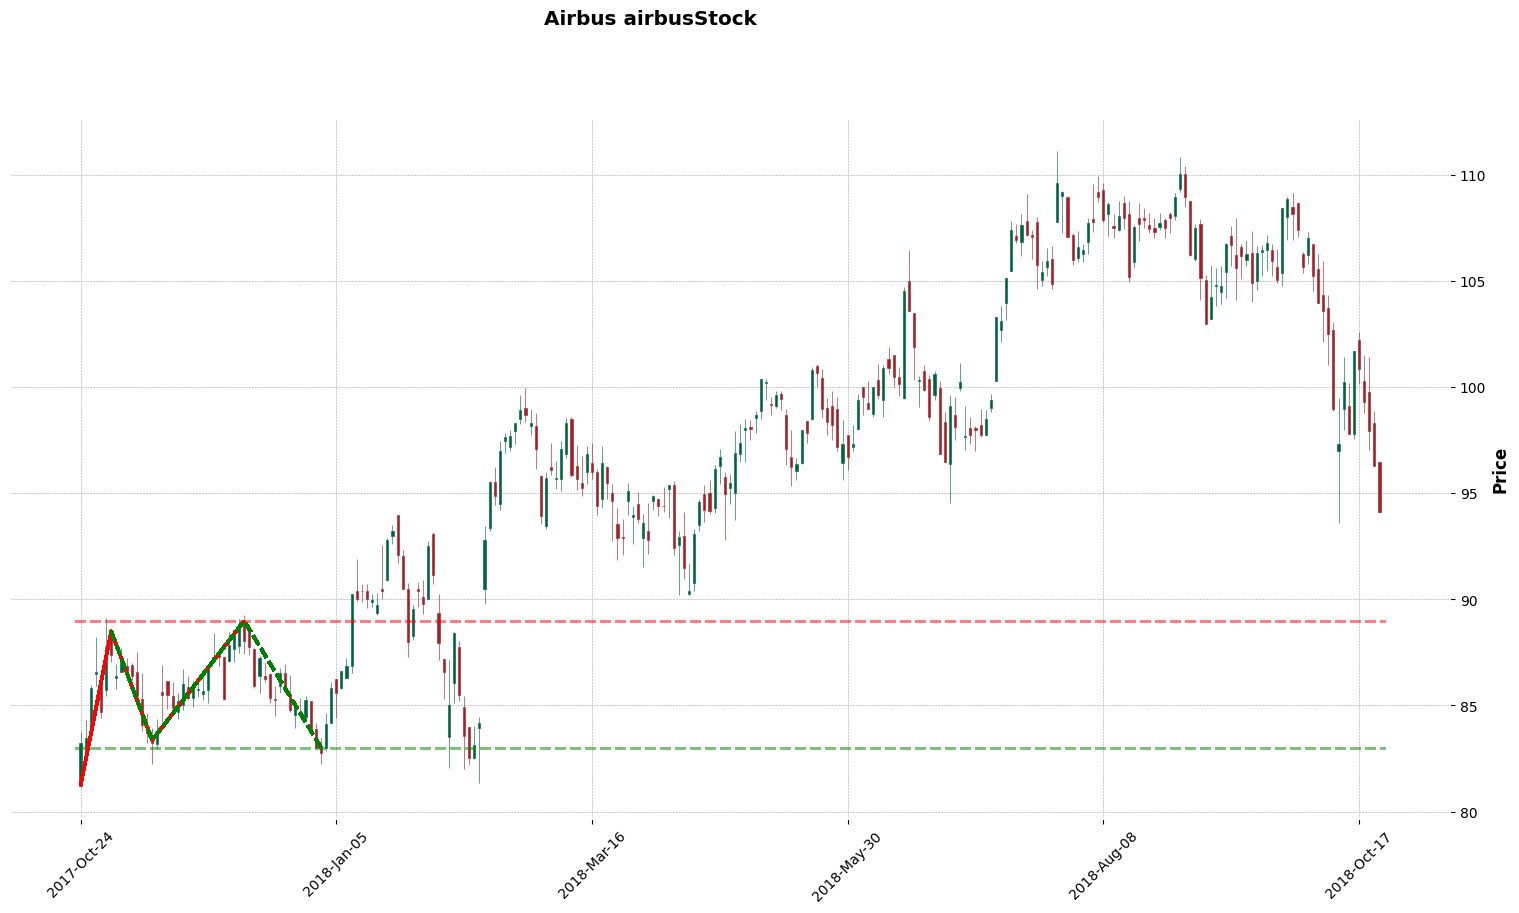

In [3]:

Wtest = [('2018-01-02',airbusStock["Open"]['2018-01-02']), 
           ('2017-12-7',airbusStock["Open"]['2017-12-7']), 
           ('2017-11-13',airbusStock["Open"]['2017-11-13']), 
           ('2017-11-1',airbusStock["Open"]['2017-11-1'])
        ]

Mtest = [ 
           ('2017-12-7',airbusStock["Open"]['2017-12-7']), 
           ('2017-11-13',airbusStock["Open"]['2017-11-13']), 
           ('2017-11-1',airbusStock["Open"]['2017-11-1']),
           ('2017-10-24',airbusStock["Open"]['2017-10-24'])
        ]
mpf.plot(airbusStock, type='candle', style='charles', title='Airbus airbusStock', figsize=(20, 10), 
        hlines=dict(hlines= [89, 83], colors = ['r','g'], alpha=0.5, linestyle='--'),
        alines= dict(alines= [Mtest,Wtest], colors = ['r','g'], linestyle=['-','--']))


Each candle represent a trading day, the color of it indicates if the closing price is lower than the opening price or not (red == lower, green == higher).

The vertical line represents the highest and lowest price of the day.
The rectangle represents the opening and closing price of the day.
Big hightest and lowest trade price might imply high volatility in the day and suggest the incentive for trader to force price to go up or down. 

In this graph we can see that that between january and march, there is a noticeable discontinuity between 2 candles. A possibility is that an event occured between the closing time of the stock exchange and its reopening the next day.

The stock has a positive trend throughout the year.

We can see that the the "figure du M" and the "figure du W" are present between the start of our trading data and 2018/01/08. They both work well in predicting the future price.



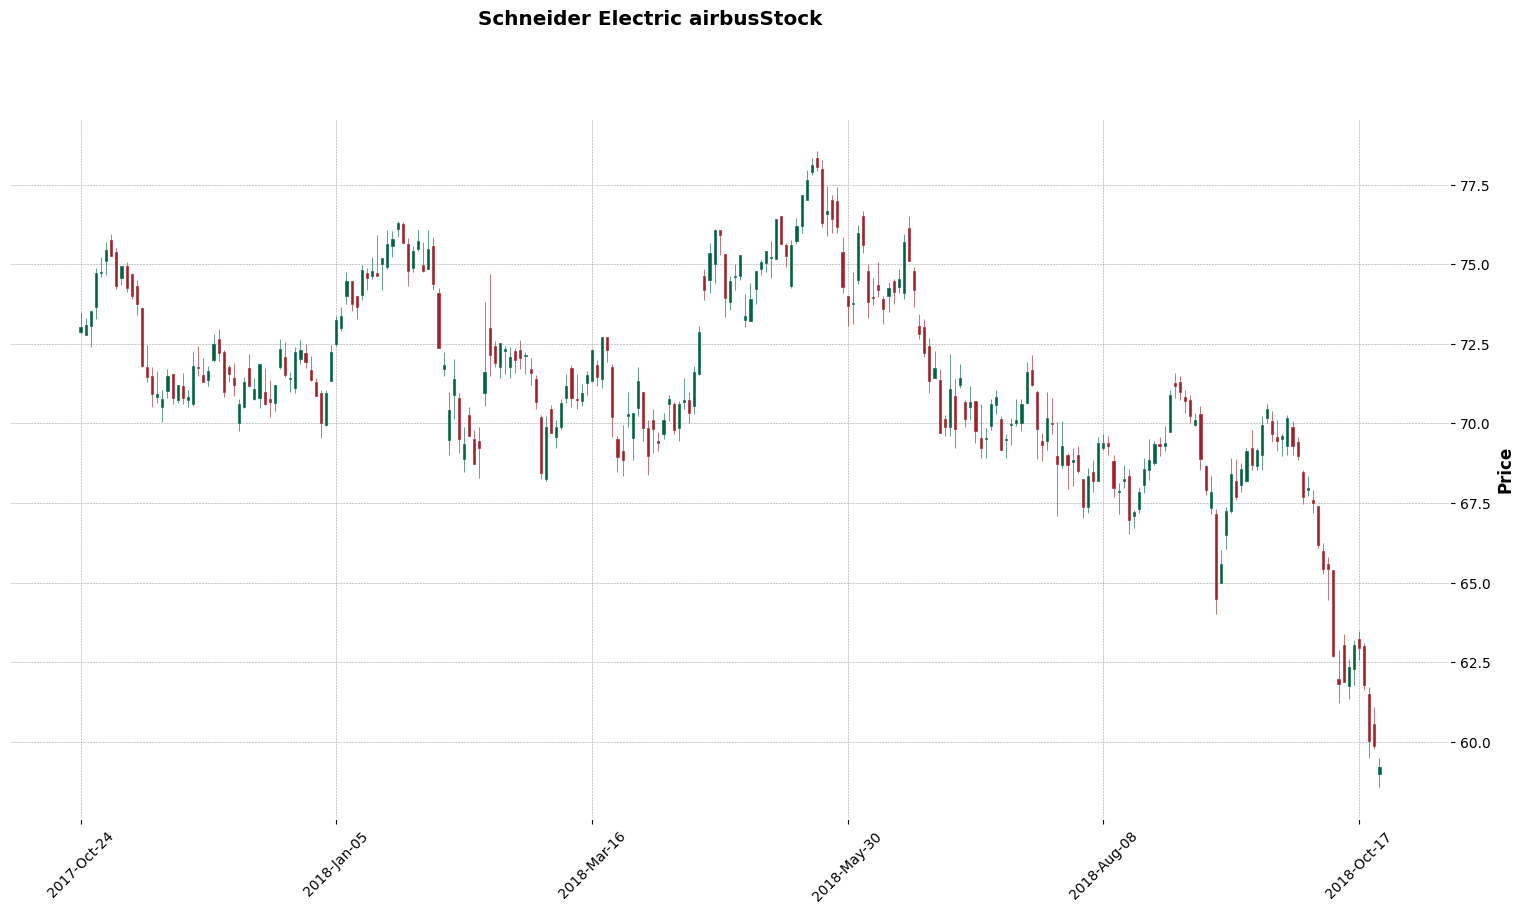

In [4]:
mpf.plot(schneiderairbusStock, type='candle', style='charles', title = 'Schneider Electric airbusStock', figsize=(20, 10))

In [5]:
print('Mean :\n', 'airbus', airbusStock['Open'].mean(), '\n schneider', schneiderairbusStock['Open'].mean())
print('Std :\n', 'airbus', airbusStock['Open'].std(), '\n schneider', schneiderairbusStock['Open'].std())
print('Volume :\n', 'airbus', int(airbusStock['Volume'].mean()), '\n schneider', int(schneiderairbusStock['Volume'].mean()))

Mean :
 airbus 96.46843121568628 
 schneider 71.2679608862745
Std :
 airbus 7.954696410244249 
 schneider 3.1778138260897193
Volume :
 airbus 1614139 
 schneider 1492865


## 3.3 Compute the return for both airbusStocks and for the CAC40 index.

In [6]:

airbusStock['return'] = (airbusStock['Adj Close'].pct_change())
schneiderairbusStock['return'] = schneiderairbusStock['Adj Close'].pct_change()
df_CAC40['return'] = df_CAC40['Adj Close'].pct_change()

airbusStock['normalized_airbusStock_price'] = (airbusStock['return']+1).cumprod() 
schneiderairbusStock['normalized_airbusStock_price'] = (schneiderairbusStock['return']+1).cumprod() 
df_CAC40['normalized_airbusStock_price'] = (df_CAC40['return']+1).cumprod() 


airbusStock = airbusStock.dropna()
schneiderairbusStock = schneiderairbusStock.dropna()
df_CAC40 = df_CAC40.dropna()

Text(0.5, 1.0, 'CAC40 Return')

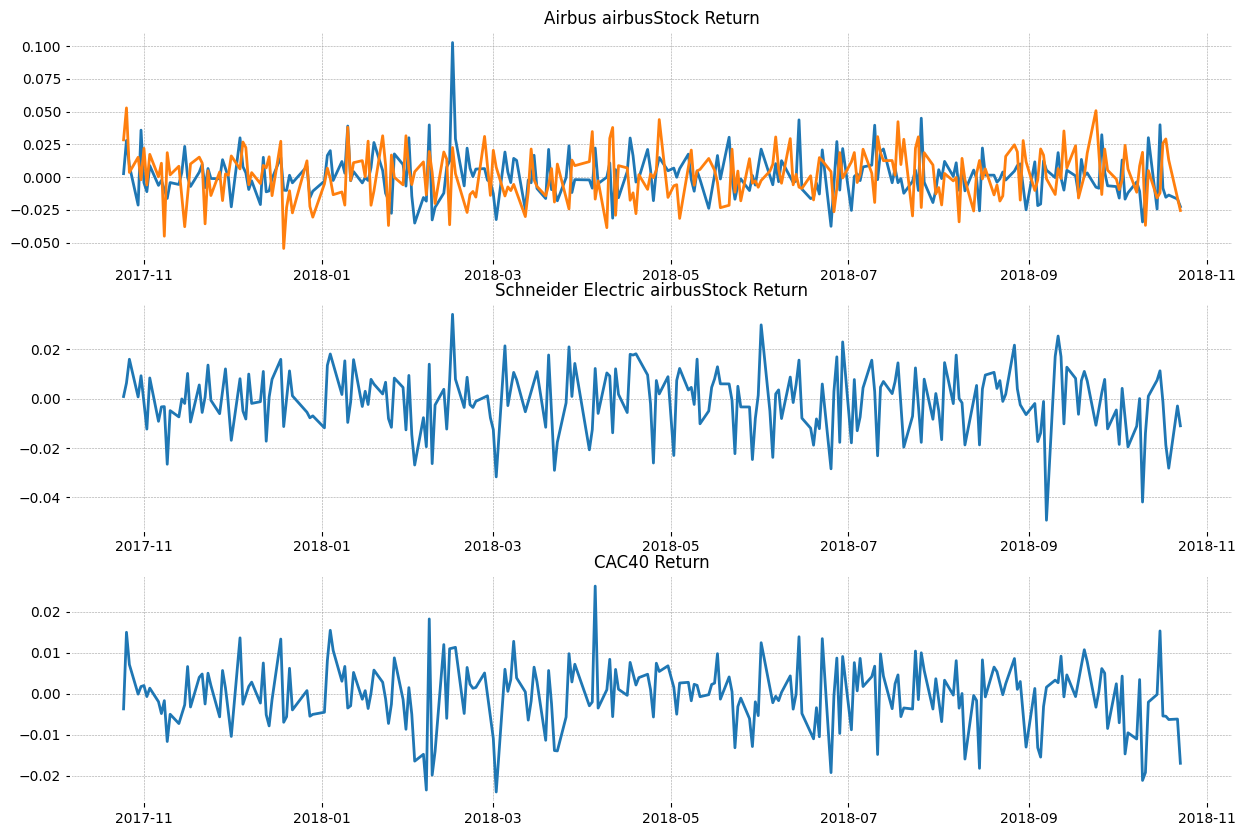

In [7]:
fig, axs = plt.subplots(3, figsize=(15, 10))

import random

def randomNoise(nsteps=1000, std=0.01, mu=0.5):
    steps = [mu + np.random.randn()*std for i in range(nsteps) ]
    return steps

randAirbus = randomNoise(nsteps = airbusStock['return'].size, std= airbusStock['return'].std() , mu= airbusStock['return'].mean())


axs[0].plot(airbusStock['return'])
axs[0].plot(airbusStock.index, randAirbus)
axs[0].set_title('Airbus airbusStock Return')

axs[1].plot(schneiderairbusStock['return'])
axs[1].set_title('Schneider Electric airbusStock Return')

axs[2].plot(df_CAC40['return'])
axs[2].set_title('CAC40 Return')

It's hard to comment and differentiate the returns only using the graphs. It seems like Schneider stock return has a lot less variance than the 2 others. I made a random variable using the std and mean of Airbus stock to have a comparison with a 'truly' random variable. Some tests could be done to check their normality.

Text(0.5, 1.0, 'Airbus airbusStock Cumulative Return')

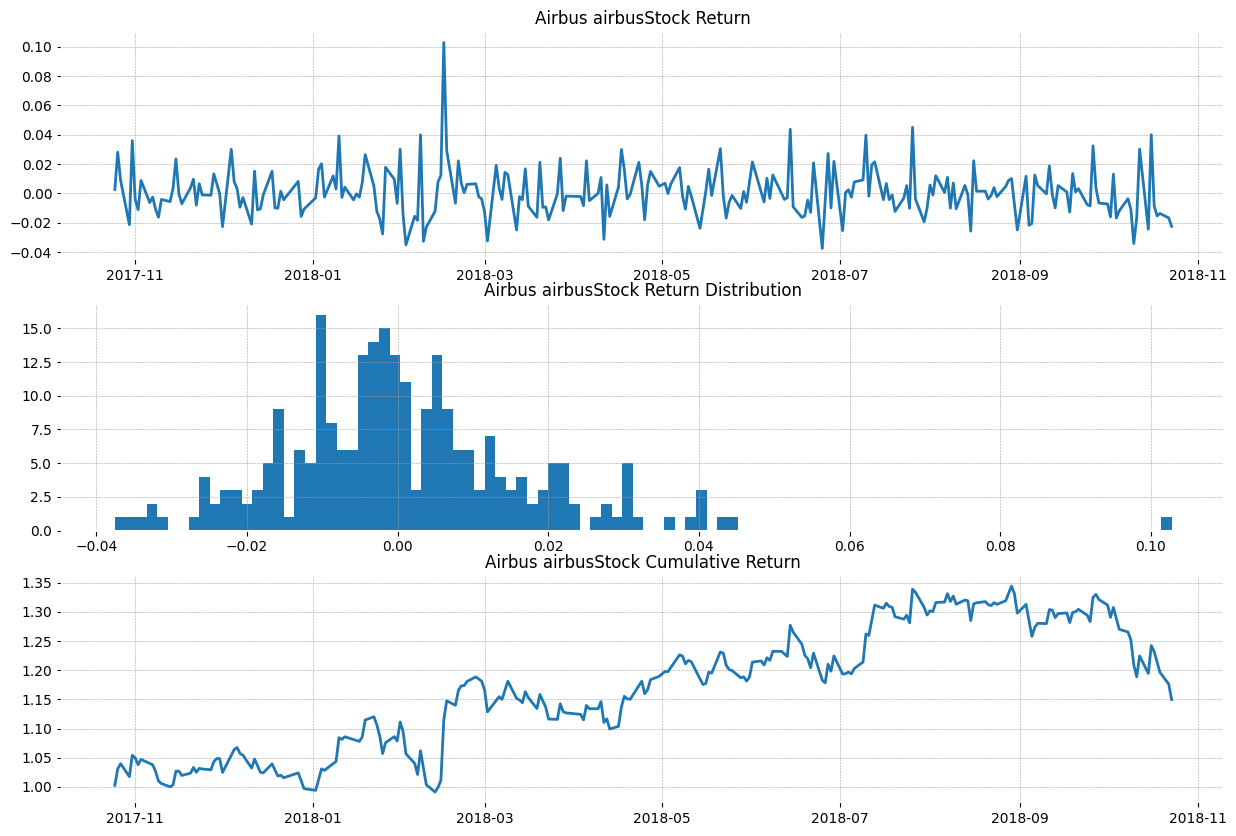

In [8]:
fig, axs = plt.subplots(3, figsize=(15, 10))

axs[0].plot(airbusStock['return'])
axs[0].set_title('Airbus airbusStock Return')


axs[1].hist(airbusStock['return'], bins=100)
axs[1].set_title('Airbus airbusStock Return Distribution')

axs[2].plot(airbusStock['normalized_airbusStock_price'])
axs[2].set_title('Airbus airbusStock Cumulative Return')


Text(0.5, 1.0, 'Schneider Electric airbusStock Cumulative Return')

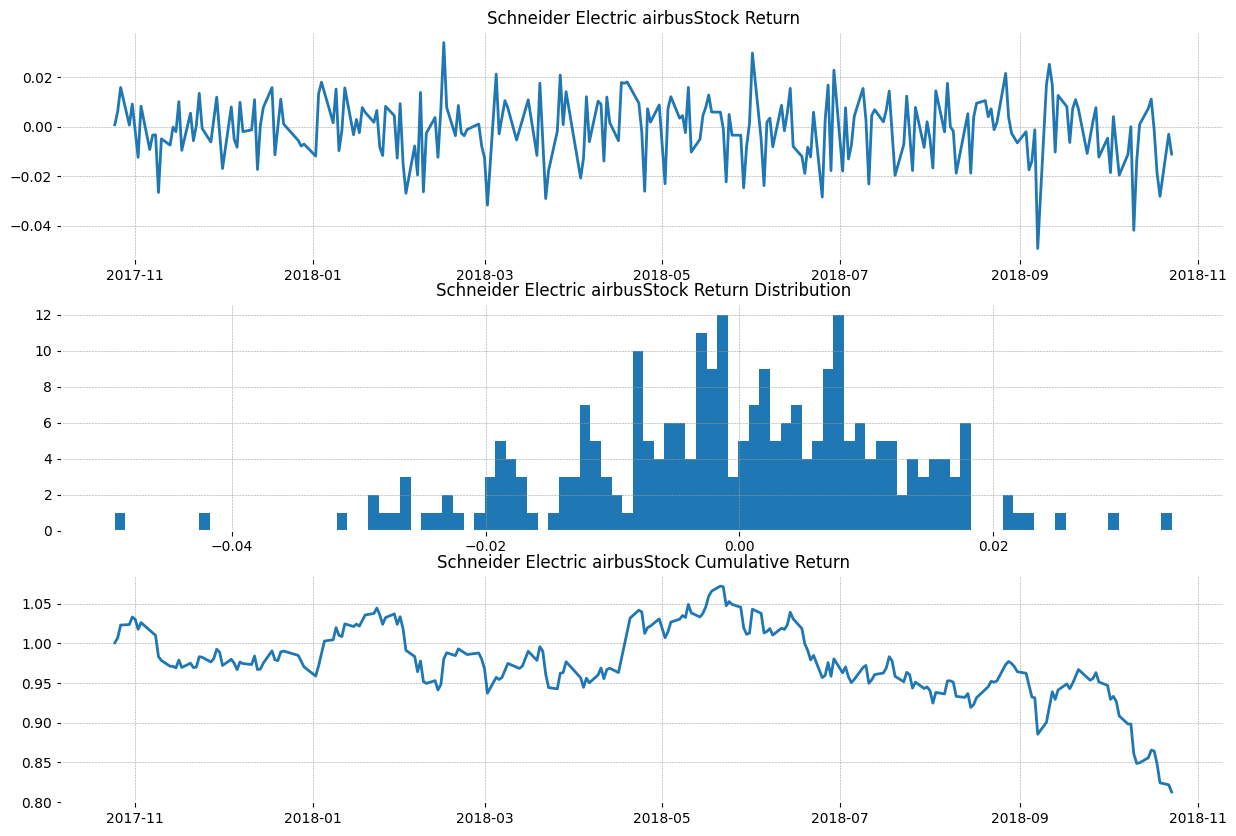

In [9]:
fig, axs = plt.subplots(3, figsize=(15, 10))

axs[0].plot(schneiderairbusStock['return'])
axs[0].set_title('Schneider Electric airbusStock Return')

axs[1].hist(schneiderairbusStock['return'], bins=100)
axs[1].set_title('Schneider Electric airbusStock Return Distribution')

axs[2].plot(schneiderairbusStock['normalized_airbusStock_price'])
axs[2].set_title('Schneider Electric airbusStock Cumulative Return')

### 3.4. Compute the coefficients of Kurtosis and of asymmetry of the 3 series of question 3.3

In [10]:
def Kurtosis(x):
    T = len(x)
    mean = np.mean(x)

    sum4 = np.sum((x - mean)**4)
    sum2 = np.sum((x - mean)**2)

    return (T-1) * sum4 / ( sum2**2) 

def Skewness(x):
    T = len(x)
    mean = np.mean(x)

    sum3 = np.sum((x - mean)**3)
    sum2 = np.sum((x - mean)**2)

    return (T-1)**0.5  * sum3 / ( sum2**(3/2))

Schneider Electric airbusStock Return :
 Kurtosis 3.6785674758407834 
 Skewness -0.48478603115428803 



Text(0.5, 1.0, 'Schneider Electric airbusStock Return Distribution')

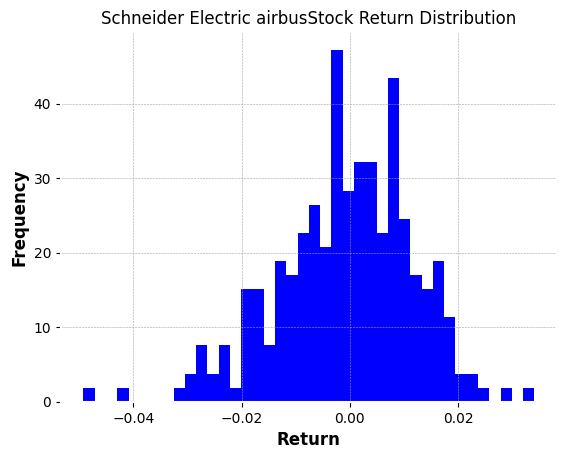

In [11]:

kurt = Kurtosis(schneiderairbusStock['return'])
skewness = Skewness(schneiderairbusStock['return'])
print('Schneider Electric airbusStock Return :\n Kurtosis', kurt,'\n Skewness', skewness ,'\n')

plt.hist(schneiderairbusStock['return'], bins=40, color='blue', density=True)

plt.xlabel('Return')
plt.ylabel('Frequency')
plt.title('Schneider Electric airbusStock Return Distribution')


- We can see that the left tail is longer wich fits our negative skew value, most of the value are concentrated on the right side of the figure (leaning to the right)
- The kurtosis value is greater than 3 (positive excess kurtosis called leptokurtic, in our case 0.69) which implies that the distribution has more 'extreme' outliers



Airbus airbusStock Return :
 Kurtosis 8.217640276255786 
 Skewness 1.1784679659638178 



Text(0.5, 1.0, 'Airbus airbusStock Return Distribution')

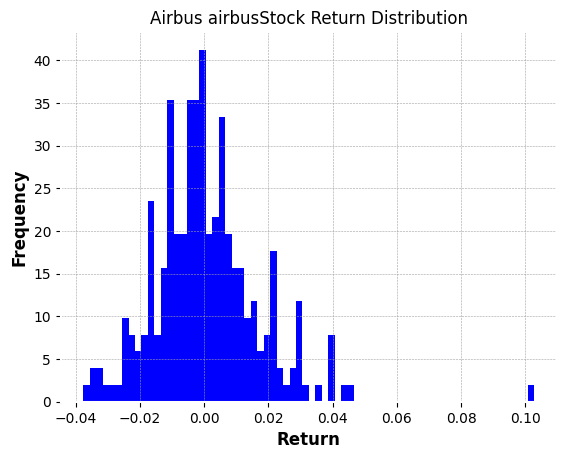

In [12]:
kurt = Kurtosis(airbusStock['return'])
skewness = Skewness(airbusStock['return'])
print('Airbus airbusStock Return :\n Kurtosis', kurt,'\n Skewness', skewness ,'\n')

plt.hist(airbusStock['return'], bins=70, color='blue', density=True)

plt.xlabel('Return')
plt.ylabel('Frequency')
plt.title('Airbus airbusStock Return Distribution')

- We can see that the right tail is longer wich fits our positive skew value, most of the value are concentrated on the right side of the figure (leaning to the right)
- The kurtosis value is greater than 3 (positive excess kurtosis called leptokurtic, in our case by a lot) which implies that the distribution has more 'extreme' outliers. Indeed, we can spot some 'extreme outlier in the return axis in position 0.10 and 0.04.


CAC40 Return :
 Kurtosis 3.686451583303303 
 Skewness -0.3257067645899198 



Text(0.5, 1.0, 'CAC40 Return Distribution')

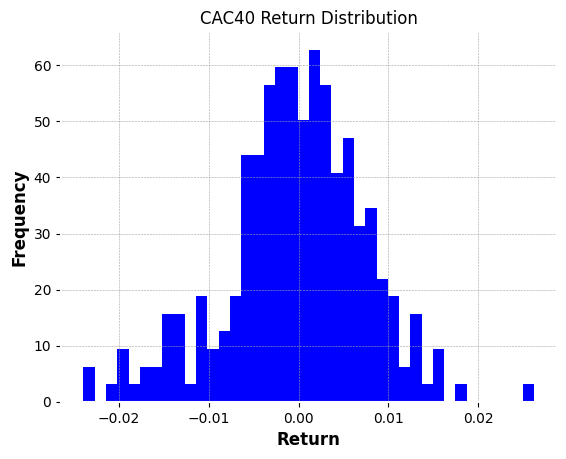

In [13]:
kurt = Kurtosis(df_CAC40['return'])
skewness = Skewness(df_CAC40['return'])

print('CAC40 Return :\n Kurtosis', kurt,'\n Skewness', skewness ,'\n')



plt.hist(df_CAC40['return'], bins=40, color='blue', density=True)

plt.xlabel('Return')
plt.ylabel('Frequency')
plt.title('CAC40 Return Distribution')


- The skewness is close to 0, we can't really tell any difference between both tails 
- The kurtosis value is greater than 3 (positive excess kurtosis called leptokurtic, in our case 0.69) which implies that the distribution has more 'extreme' outliers


### 3.5. Compute the standard errors of the return for both airbusStocks for the full period and then for 3 sub-periods of equal size. Is volatility constant? 


In [14]:
# 3.5. Compute the standard errors of the return for both airbusStocks for the full period and then for 3 sub-periods of equal size. Is volatility constant? 

std_airbus = airbusStock['return'].std()
std_schneider = schneiderairbusStock['return'].std()

third = int(len(airbusStock)/3)

sub_periods = lambda x : [x['return'].iloc[:third], 
               x['return'].iloc[third:2*third], 
               x['return'].iloc[2*third:]]


sub_periods_std = lambda x : [val.std() for val in sub_periods(x)]

sub_periods_std_airbus = sub_periods_std(airbusStock)
sub_periods_std_schneider = sub_periods_std(schneiderairbusStock)
print('Airbus airbusStock Return :\n Standard Deviation :', std_airbus, 
    '\n 1st period', sub_periods_std_airbus[0], 
    '\n 2nd period', sub_periods_std_airbus[1], 
    '\n 3rd period', sub_periods_std_airbus[2], '\n')

print('Schneider Electric airbusStock Return :\n Standard Deviation :', std_schneider,
      '\n 1st period', sub_periods_std_schneider[0], 
      '\n 2nd period', sub_periods_std_schneider[1], 
      '\n 3rd period', sub_periods_std_schneider[2])


Airbus airbusStock Return :
 Standard Deviation : 0.016481431234654453 
 1st period 0.01922880732886661 
 2nd period 0.014510100469213787 
 3rd period 0.015456216555013088 

Schneider Electric airbusStock Return :
 Standard Deviation : 0.01249406369535436 
 1st period 0.01085235381859932 
 2nd period 0.01301415264580375 
 3rd period 0.01350863120389286


### Is volatility constant ?

- For the Airbus airbusStock, the standard deviation of returns decreases from the first period to the second, then increases slightly in the third period. This suggests that the price of the Airbus airbusStock was more volatile in the first period and less volatile in the second and third periods.

- For the Schneider Electric airbusStock, the standard deviation of returns increases from the first period to the second and third periods. This suggests that the price of the Schneider Electric airbusStock was less volatile in the first period and more volatile in the second and third periods.


### 3.6. Compute the correlation between each airbusStock and the CAC40. Comment on your results

In [15]:
correlation_airbus_CAC40 = airbusStock['return'].corr(df_CAC40['return'])
correlation_schneider_CAC40 = schneiderairbusStock['return'].corr(df_CAC40['return'])

print('Correlation between Airbus airbusStock and CAC40 :', correlation_airbus_CAC40)
print('Correlation between Schneider Electric airbusStock and CAC40 :', correlation_schneider_CAC40)

Correlation between Airbus airbusStock and CAC40 : 0.6883862281530357
Correlation between Schneider Electric airbusStock and CAC40 : 0.7453700579512998


Both airbusStocks returns are positevely and highly corrolated to the CAC40 returns (0.68 for Airbus and 0.74 for Schneider Electric).

This correlation is particularly unsurprising given their inclusion in the CAC40 market index, a capitalization-weighted measure. Notably, Airbus and Schneider Electric, holding the 5th and 6th positions in market capitalization on Euronext Paris, exert a substantial impact on the index's variation. 

Moreover, the CAC40 being a price return index, its fluctuation is solely influenced by changes in the prices of the constituent airbusStocks.


### 3.7. Compute the returns of a portfolio in which both airbusStocks have an equal weight. Compute the average return and the standard deviation over the whole sample period. Comment on your results. 


In [16]:
portfolioMerge = (airbusStock['return'] + schneiderairbusStock['return']) / 2

average_return = portfolioMerge.mean()
std_deviation = portfolioMerge.std()

print('Portfolio Average Return :', average_return)
print('Portfolio Standard Deviation :', std_deviation)
print()

print('Airbus airbusStock Average Return :', airbusStock['return'].mean())
print('Airbus airbusStock Standard Deviation :', airbusStock['return'].std())
print()

print('Schneider Electric airbusStock Average Return :', schneiderairbusStock['return'].mean())
print('Schneider Electric airbusStock Standard Deviation :', schneiderairbusStock['return'].std())



Portfolio Average Return : -2.740766871871193e-05
Portfolio Standard Deviation : 0.012935671779714233

Airbus airbusStock Average Return : 0.0006827981833205742
Airbus airbusStock Standard Deviation : 0.016481431234654453

Schneider Electric airbusStock Average Return : -0.0007376135207579981
Schneider Electric airbusStock Standard Deviation : 0.01249406369535436


A portfolio is a combination of financial assets. In our case, our portfolio consists of 2 airbusStocks with even weights.

The main interest to create a portfolio is to manage the risk/reward ratio, but most importantly, to maximize the return while minimizing the risk. It allows flexibility to risk managment.

Instead of choosing between, Schneider and Airbus,and risking the potentiality that the airbusStock you chose underperform or that its price declines, having the two of them enables diversification. Diversification helps mitigate the impact of poor performance in one airbusStock by balancing it with the potential outperformance of the other. By spreading the investment across different assets, the portfolio becomes less susceptible to the individual fluctuations of Schneider and Airbus airbusStocks.

The overall standart deviation of our portfolio is way lower compared to Airbus airbusStock limiting the risk of loss. The average return was also flatened. 

Annualized Return Airbus airbusStock : 0.14662752347733266
Annualized Return Airbus airbusStock with return mean : 0.18849641478122026


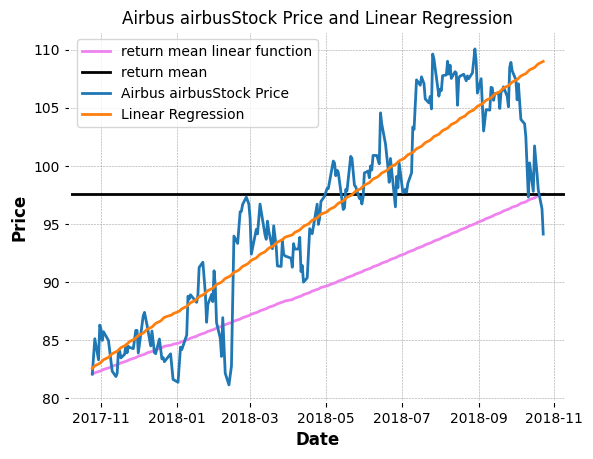

In [17]:
from sklearn.linear_model import LinearRegression

X = np.arange(airbusStock['Adj Close'].size).reshape(-1,1)
model = LinearRegression().fit(X,airbusStock['Adj Close'])


# get constant and slope

constant_return_airbus = model.intercept_
linear_return_airbus = model.coef_[0]

annual_return = airbusStock['Adj Close'].iloc[-1] / airbusStock['Adj Close'].iloc[0] -1

return_mean = airbusStock['return'].mean()  


y_mean = np.ones(airbusStock['Adj Close'].size ) * (return_mean +1)
y_mean[0] = 1
y_mean = np.cumprod(y_mean)


annual_return_mean = y_mean[-1]


print('Annualized Return Airbus airbusStock :', annual_return)
print('Annualized Return Airbus airbusStock with return mean :', y_mean[-1] -1 )



plt.plot(airbusStock['Adj Close'].index, y_mean* airbusStock['Adj Close'].iloc[0], label='return mean linear function', color='violet')
plt.axhline(y= annual_return_mean * airbusStock['Adj Close'].iloc[0], color='black', linestyle='-', label='return mean')


plt.plot(airbusStock['Adj Close'], label='Airbus airbusStock Price')
plt.plot(airbusStock.index, model.predict(X), label='Linear Regression')


plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Airbus airbusStock Price and Linear Regression')
plt.legend()
plt.show()




### 3.8. Consider a portfolio with one airbusStock and the risk-free interest rate (you can choose the airbusStock out of the two that are available). What is the optimal portfolio allocation between these two assets for an investor with a utility function presented in the course and A=1.5? 

In [18]:
A = 1.5

airbusStock_return_mean = airbusStock['return'].mean()

df_US_Treasury_return_mean= df_US_Treasury['Adj Close'].mean()

"""" 
Assuming 13 weeks treasury bill as risk free rate for annualized return
"""
risk_free_rate = (df_US_Treasury_return_mean/100)/252


"""
Optimal Portfolio Allocation for utility function U(w) = E(Ra) - 0.5 * A * Sa^2
"""
w = (airbusStock_return_mean - risk_free_rate) / (A * airbusStock['return'].var())


print('\nOptimal Portfolio Allocation :', w)



Optimal Portfolio Allocation : 1.5081929119837774


The weight value is positive (1.5) which means we should be borowing money from the government at the risk free rate. 
To maximize our utility function we should allocate a weight of 1.5 for the airbus airbusStock and 0.5 to the risk free rate. 


### 3.9. Consider the following 3 portfolios: portfolio 1 has airbusStock 1 as the only component; portfolio 2 has airbusStock 2 as the only component; portfolio 3 is the portfolio of question 3.7. These are the only portfolio available to investors. Draw the efficient frontier. Which portfolio are inefficient? 


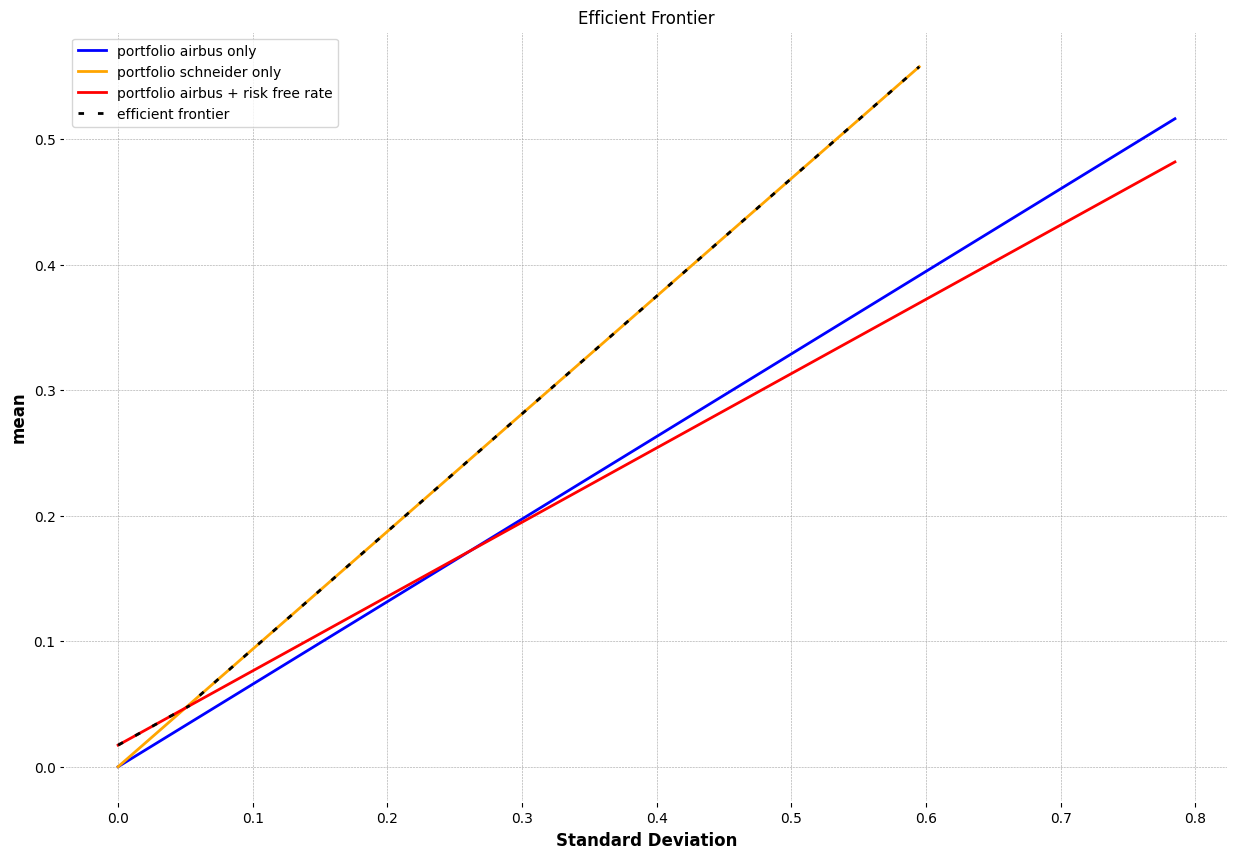

In [19]:
airbusStock_return_mean = airbusStock['return'].mean() 


df_US_Treasury_return_mean= df_US_Treasury['Adj Close'].mean()
risk_free_rate = (df_US_Treasury_return_mean/100) /(252)


w = np.linspace(0,3,60)

""" portfolio airbus only """

m =  w*airbusStock_return_mean * 252
v =  np.abs(w)*airbusStock['return'].std() * np.sqrt(252)

# draw a point for the portfolio
plt.plot(v, m, label='portfolio airbus only', color='blue')


""" portfolio schneider only """

m =  -w*schneiderairbusStock['return'].mean() * 252
v =  np.abs(w)*schneiderairbusStock['return'].std()  * np.sqrt(252)

plt.plot(v, m, label='portfolio schneider only', color='orange')
plt.plot(v[6:], m[6:], color='black', linestyle= (0, (2, 5)))


""" airbus + risk free rate """
m1 = (w* (airbusStock_return_mean) + (1-w)*risk_free_rate) * 252
v1 = np.abs(w) * airbusStock['return'].std() * np.sqrt(252)


plt.plot(v1, m1, label='portfolio airbus + risk free rate', color='red')
plt.plot(v1[:5], m1[:5], label='efficient frontier', color='black', linestyle= (0, (2, 5)))


""" portflolio schneider + airbus """
"""
schneiderairbusStock_return_rean = schneiderairbusStock['return'].mean() 

m =  w* airbusStock_return_mean + (1-w)* schneiderairbusStock_return_rean
v = np.sqrt( w**2 * airbusStock['return'].var() + (1-w)**2 * schneiderairbusStock['return'].var() + 2*w*(1-w)*schneiderairbusStock['return'].cov(airbusStock['return']))

plt.plot(v, m, label='portfolio airbus + schneider', color='green')

"""


plt.xlabel('Standard Deviation')
plt.ylabel('mean')
plt.legend()
plt.title('Efficient Frontier')
plt.gcf().set_size_inches(15, 10)


### Which portfolio are inefficient ?

All the portfolio that are below the efficient frontier drawn above are considere inefficient. For instance, the portfolio with Airbus airbusStock only is considered inefficient no matter the weight used. Indeed, for a given mean, its standart deviation is always going to be greater than the other portfolios


## 3.10. Consider the portfolio of question 3.7. Compute the Sharpe ratio, the Sortino ratio, the Sterling ratio. 

In [20]:
risk_free_rate = (df_US_Treasury_return_mean/100) * 1/252

w = (airbusStock['return'].mean() - risk_free_rate) / (A * airbusStock['return'].var())



# considering return has a daily frequency, we annualize them by multiplying by 255 

def sharpe_ratio(return_series, rf):
    mean = return_series.mean()*252 -rf
    sigma = return_series.std() * (255**0.5)
    return mean / sigma

def sortino_ratio(return_series, rf):
    mean = return_series.mean()*252 - rf
    sigma = return_series[return_series < rf].std() * (252**0.5)
    return mean / sigma

def sterling_ratio(return_series, rf):
    mean = return_series.mean()* 252 -rf
    sigma = return_series.std() * (252**0.5)

    cumulated_return = (return_series + 1).cumprod()

    DDtau = lambda tau : max(0,np.max( cumulated_return.iloc[:tau] - cumulated_return.iloc[tau]))
    DDs = [DDtau(tau) for tau in range(1,len(cumulated_return))]

    MDD = np.max(DDs)


    return mean / (MDD)



port = (w * airbusStock['return'] + (1-w) * risk_free_rate)


print('Sharpe Ratio :', sharpe_ratio(port, risk_free_rate*252)) 
print('Sortino Ratio :', sortino_ratio(port, risk_free_rate*252))
print('Sterling ratio :',sterling_ratio(port, risk_free_rate*252))







Sharpe Ratio : 0.5884011702752906
Sortino Ratio : 0.952508124924074
Sterling ratio : 0.718145723481144


### Why are there differences between these ratios? 

All of these ratios are used to measure the performance of a portfolio quantifying how effectively a portfolio is generating returns relative to the risk taken.

They all use the risk free rate as a benchmark substracting it with the portfolio's expected return. This result is then divided by a measure of the risk that will fluctuate depending on the ratio used 

- The Sharpe ratio uses the standard deviation of the portfolio's return as a measure of risk. It is the most common ratio used.

- The Sortino ratio uses the standard deviation of the portfolio's negative return as a measure of risk. This measure of the risk "penalizes" only the downside volatility. 

- The Sterling ratio evaluates the return of a portfolio relative to its maximum drawdown. Drawdown represents the peak-to-trough decline in the portfolio's value. It emphasises on the importance of significant loss in the computation.

All of these ratio provides valuable insights into the performance of portfolios. The use of one or another depends on the specific goals and concerns of an investor.

In our case, all ratios are above 0 which implies that the return is greater than the risk free rate. The sortino ratio is greater than the sharp ratio, it means that the downside volatility is lower compared to the upside one. 

### 3.12. Compute the empirical VAR at 1% for the same portfolio. Compute the 1st percentile of the normal distribution with mean and variance corresponding respectively to the empirical mean and to the empirical variance. Comment on your results. 

In [21]:
from scipy.stats import norm

var = norm.ppf(0.01, port.mean(), port.std()) 
print('Value at Risk :', -var)


Value at Risk : 0.056831348339899626


The Value at Risk tells us with 95% confidence (considering our portfolio follow a normal distribution) that we won't exceed a ~5.6% negative return over a 1 day period

### 3.12. Compute the VAR using resampling with 1000 observations. Compute the 1% VAR on the simulated data set. Comment on your results. 

In [22]:
print('Var (%) for a 1 year time period  :', np.abs(var) * 100, '%\n')

print('Var (%) for a 1 year time period using resampling :')

print("\n Using random value from the portfolio return :")
for i in range(10):
    rand_obs = np.random.choice(port, size=1000)
    print(' ', np.abs(norm.ppf(0.01, rand_obs.mean(), rand_obs.std()))* 100, '%')

print(' \n Using Bootstrapping :')
for i in range(10):
    rand_obs = np.random.normal(port.mean(),port.std(), size=1000)
    print(" ", np.abs(norm.ppf(0.01, rand_obs.mean(), rand_obs.std()))* 100, '%')

Var (%) for a 1 year time period  : 5.683134833989962 %

Var (%) for a 1 year time period using resampling :

 Using random value from the portfolio return :
  5.580997928876045 %
  5.325378382454881 %
  5.796821366415433 %
  5.572067685071914 %
  5.5600466645777376 %
  5.652102588710896 %
  5.772578587493889 %
  5.495986026825189 %
  5.9304055533477325 %
  5.26236996242941 %
 
 Using Bootstrapping :
  5.686616002011306 %
  5.641305211913932 %
  5.998777879762796 %
  5.3727725618938935 %
  5.731325452644761 %
  5.654412169578595 %
  5.735966021399321 %
  5.593532332120415 %
  5.698180776174588 %
  5.559802267373699 %


We can see that the estimate vary tremendously even with a bootstrapping resampling strategy which indicates the uncertainty in the value at risk estimation.

## Question 4
### Run an automated trading algorithm using any method you want (moving averages, candlesticks, patterns, ML, …) over the sample period. You can only have 3 positions: buy/sell, short/cover, do nothing. You cannot use derivative products. Can you beat the market? 


Lets work on a basic crossover moving average strategy
- Looking at MA(5) and MA(20)
- we buy when MA(5) gets over MA(20)
- we sell when MA(5) gets under MA(20)
- Do the opposite for short position


In [23]:
def cross(MA1, MA2):
    index = MA2.size - MA2.dropna().size # number of nan values / 1st valid index of MA2
    over = MA1.iloc[index] > MA2.iloc[index]
    signals = [ 0 for i in range(index)]

    for i in range(index, MA2.size):
        if MA1.iloc[i] > MA2.iloc[i] and not over:
            signals.append(1)
            over = True
        elif MA1.iloc[i] < MA2.iloc[i] and over:
            signals.append(-1)
            over = False
        else:
            signals.append(0)

    return pd.Series(signals, index=MA1.index)

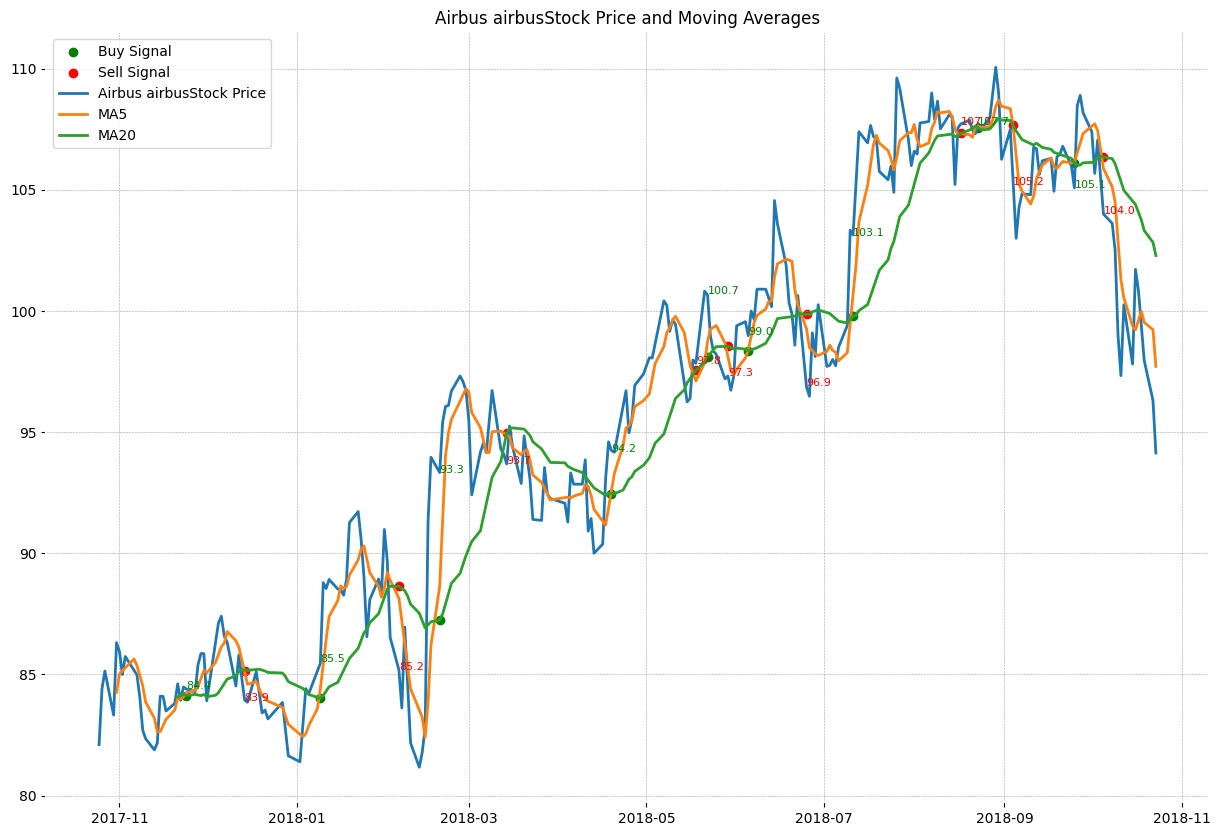

In [24]:


MA5 = airbusStock['Adj Close'].rolling(window=5).mean()
MA20 = airbusStock['Adj Close'].rolling(window=20).mean()

result = cross(MA5, MA20)

buySignal = result[result == 1]
sellSignal = result[result == -1]


plt.scatter(result.index, result[result == 1] * MA20, color='green', label='Buy Signal')



for i in buySignal.index:
    plt.text(i, round(airbusStock['Adj Close'].loc[i],1), round(airbusStock['Adj Close'].loc[i],1), fontsize=8, color='g')

plt.scatter(result.index,  - result[result == -1] * MA20, color='red', label='Sell Signal')

for i in sellSignal.index:
    plt.text(i, round(airbusStock['Adj Close'].loc[i],1), round(airbusStock['Adj Close'].loc[i],1), fontsize=8, color='r')

plt.plot(airbusStock['Adj Close'], label='Airbus airbusStock Price')
plt.plot(MA5, label='MA5')
plt.plot(MA20, label='MA20')

plt.legend()
plt.title('Airbus airbusStock Price and Moving Averages')

# increase plot size
plt.gcf().set_size_inches(15, 10)



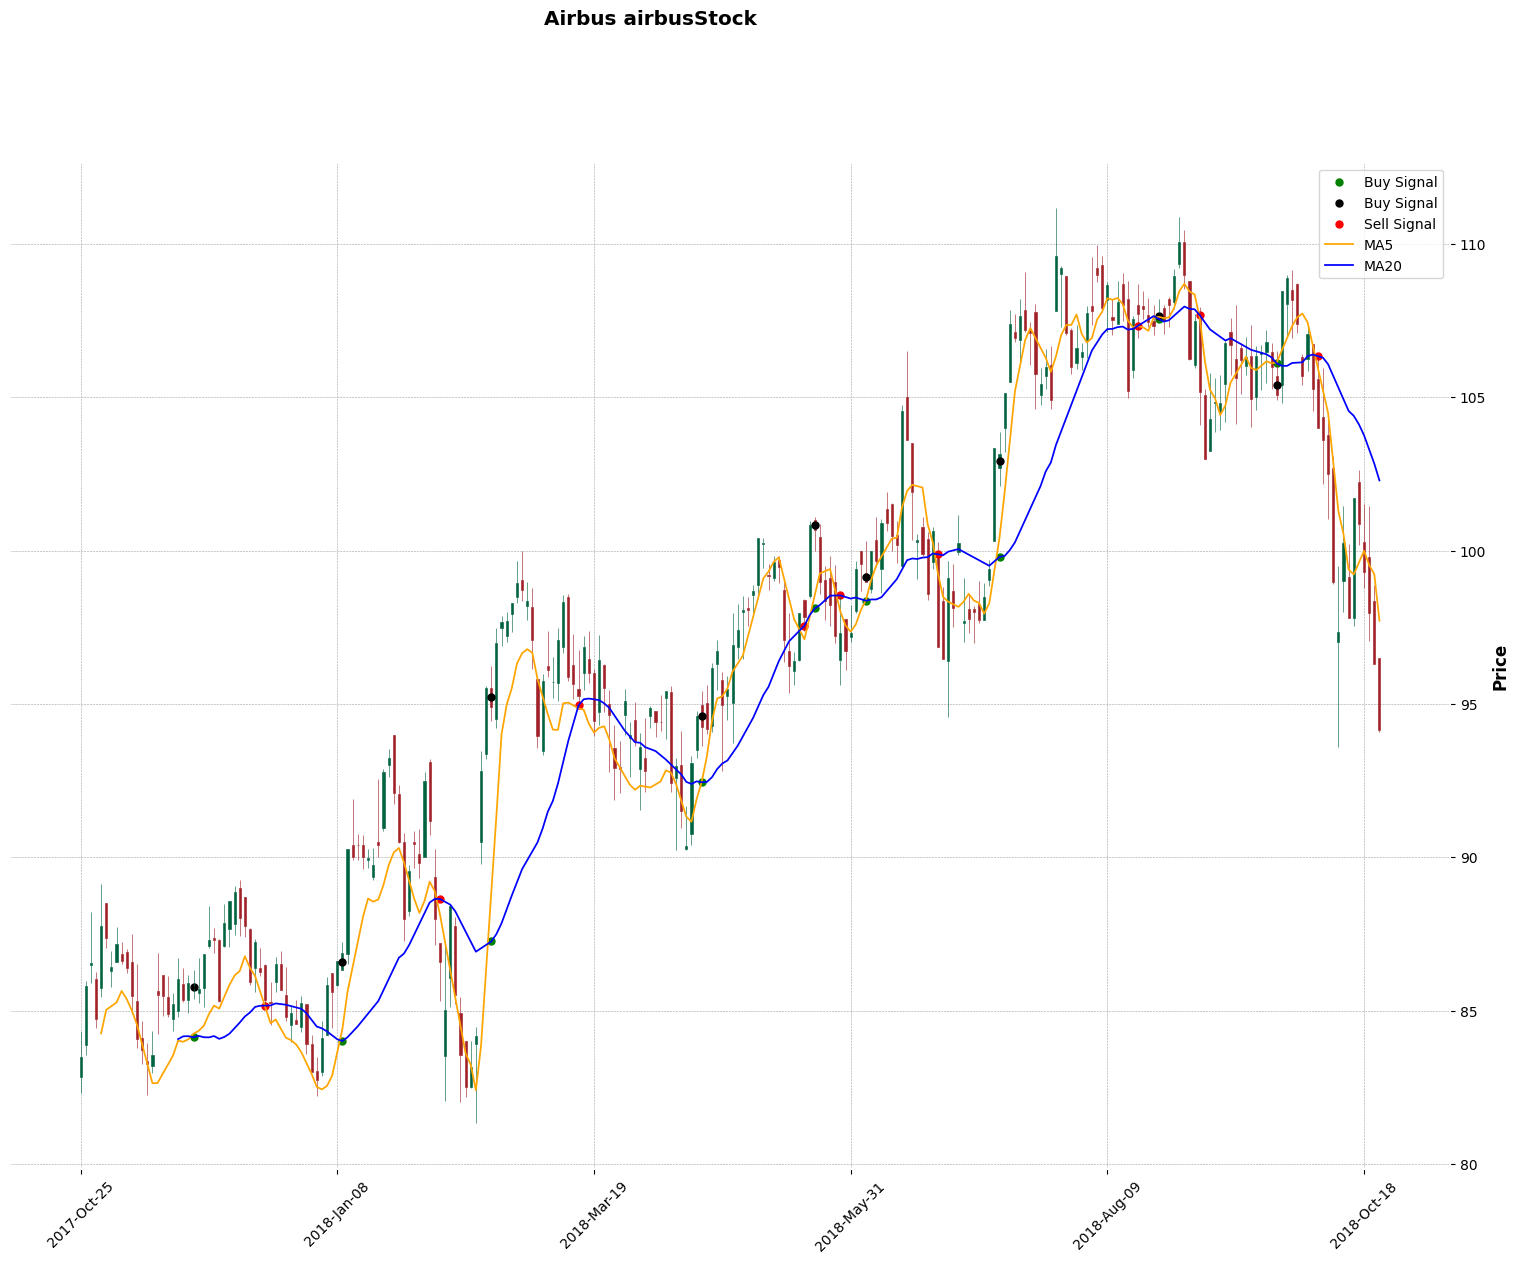

In [25]:
MA5 = airbusStock['Adj Close'].rolling(window=5).mean()
MA20 = airbusStock['Adj Close'].rolling(window=20).mean()

result = cross(MA5, MA20)

buySignal = result[result == 1]
sellSignal = result[result == -1]

airbusStock['Buy Signal'] = airbusStock['Adj Close'][result==1]
airbusStock['Sell Signal'] = airbusStock['Adj Close'][result==-1]


apsSignal = [mpf.make_addplot( result[result == 1] * MA20, type='scatter', markersize=100, marker='.', color='g', label='Buy Signal'), 
             mpf.make_addplot( result[result == 1] * ((airbusStock['Close'] + airbusStock['Open'])/2), type='scatter', markersize=100, marker='.', color='black', label='Buy Signal'),
             mpf.make_addplot( -result[result == -1] * MA20, type='scatter', markersize=100, marker='.', color='r', label='Sell Signal'),
             mpf.make_addplot(MA5, color='orange', label='MA5'),
             mpf.make_addplot(MA20, color='blue', label='MA20')
             ]

fig, axes = mpf.plot(airbusStock, type='candle', style='charles', title='Airbus airbusStock', addplot= apsSignal, figscale=2.5, returnfig=True)





In [26]:
def tradeAlgo(stock, MA1=5, MA2=10) : 
    MA1 = stock['Adj Close'].rolling(window=MA1).mean()
    MA2 = stock['Adj Close'].rolling(window=MA2).mean()

    result = cross(MA1, MA2) # cross over index from the 2 moving averages
    result = result[result != 0]

    buy_sell_Time = result[result != 0].index
    buy_sell = stock['Adj Close'][buy_sell_Time] # sell and buy time indicator

    return_short = []
    return_long = []

    if result.iloc[0] == 1:
        print('buy first')
        for i in range(1,buy_sell.size-1, 2):
            return_long.append(buy_sell.iloc[i]/buy_sell.iloc[i-1])
            return_short.append(buy_sell.iloc[i]/buy_sell.iloc[i+1])

    else :
        print('sell first')
        for i in range(1,buy_sell.size -1,2):
            return_long.append(buy_sell.iloc[i+1]/buy_sell.iloc[i])
            return_short.append(buy_sell.iloc[i-1]/buy_sell.iloc[i])

            #print(buy_sell.iloc[i-1], buy_sell.iloc[i], buy_sell.iloc[i+1])
            #print(buy_sell.iloc[i-1]/buy_sell.iloc[i], buy_sell.iloc[i+1]/buy_sell.iloc[i])

    return return_long, return_short, result.iloc[0] == 1

In [27]:
return_long, return_short, _ =  tradeAlgo(airbusStock, 5, 20)

print('Cumulative return long :', np.prod(return_long), ', mean long :', np.mean(return_long))
print('Cumulative return short :', np.prod(return_short), ', mean :', np.mean(return_short))


buy first
Cumulative return long : 0.9964927329591565 , mean long : 0.9999087110417584
Cumulative return short : 0.800318386379232 , mean : 0.9729949623460071


The crossover seems to state more that the trend is over more than anything else which results in trades being always to late. The MA chosen might not be the best. It mostly emphasize that MA are more of an indicator than real tool to algorithmic trading, it could however be used in conjunction with other indicator to make a more precise algorithmic tool.